In [1]:
import pandas as pd
import numpy as np

In [2]:
import json
path = 'datasets/bitly_usagov/example.txt'
records = [json.loads(line) for line in open(path)]

In [3]:
records[0]

{'a': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11',
 'c': 'US',
 'nk': 1,
 'tz': 'America/New_York',
 'gr': 'MA',
 'g': 'A6qOVH',
 'h': 'wfLQtf',
 'l': 'orofrog',
 'al': 'en-US,en;q=0.8',
 'hh': '1.usa.gov',
 'r': 'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf',
 'u': 'http://www.ncbi.nlm.nih.gov/pubmed/22415991',
 't': 1331923247,
 'hc': 1331822918,
 'cy': 'Danvers',
 'll': [42.576698, -70.954903]}

In [4]:
time_zones = [rec['tz'] for rec in records]

KeyError: 'tz'

In [5]:
time_zones = [rec['tz'] for rec in records if 'tz' in rec]

In [6]:
time_zones[:10]

['America/New_York',
 'America/Denver',
 'America/New_York',
 'America/Sao_Paulo',
 'America/New_York',
 'America/New_York',
 'Europe/Warsaw',
 '',
 '',
 '']

In [7]:
from collections import defaultdict
def get_counts2(sequence):
    counts = defaultdict(int) # values will initialize to 0
    for x in sequence:
        counts[x] += 1
    return counts
counts = get_counts2(time_zones)
counts['America/New_York']

1251

In [8]:
def top_counts(count_dict, n=10):
    value_key_pairs = [(count, tz) for tz, count in count_dict.items()]
    value_key_pairs.sort()
    return value_key_pairs[-n:]

top_counts(counts)

[(33, 'America/Sao_Paulo'),
 (35, 'Europe/Madrid'),
 (36, 'Pacific/Honolulu'),
 (37, 'Asia/Tokyo'),
 (74, 'Europe/London'),
 (191, 'America/Denver'),
 (382, 'America/Los_Angeles'),
 (400, 'America/Chicago'),
 (521, ''),
 (1251, 'America/New_York')]

In [9]:


df = pd.DataFrame(records)

clean_tz = df['tz'].fillna('Missing')
clean_tz[clean_tz == ''] = 'Unknown'
clean_tz.value_counts()[:10]

America/New_York       1251
Unknown                 521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Missing                 120
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
Name: tz, dtype: int64

In [10]:
cframe = df.a.dropna()
results = pd.Series([x.split()[0]for x in cframe])


In [11]:
import numpy as np
cframe = df[df.a.notnull()]
cframe['os'] = np.where(cframe['a'].str.contains('Windows'), 'Windows', 'Not Windows')

/tmp/ipykernel_30158/1523161401.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cframe['os'] = np.where(cframe['a'].str.contains('Windows'), 'Windows', 'Not Windows')


In [12]:
cframe['os'][:5]
by_tz_os = cframe.groupby(['tz', 'os'])
print(by_tz_os.size().index)
by_tz_os.size()

MultiIndex([(                              '', 'Not Windows'),
            (                              '',     'Windows'),
            (                  'Africa/Cairo',     'Windows'),
            (             'Africa/Casablanca',     'Windows'),
            (                  'Africa/Ceuta',     'Windows'),
            (           'Africa/Johannesburg',     'Windows'),
            (                 'Africa/Lusaka',     'Windows'),
            (             'America/Anchorage', 'Not Windows'),
            (             'America/Anchorage',     'Windows'),
            ('America/Argentina/Buenos_Aires', 'Not Windows'),
            ...
            (                 'Europe/Vienna', 'Not Windows'),
            (                 'Europe/Vienna',     'Windows'),
            (                'Europe/Vilnius',     'Windows'),
            (              'Europe/Volgograd',     'Windows'),
            (                 'Europe/Warsaw', 'Not Windows'),
            (                 'Europe/W

/tmp/ipykernel_30158/4037470307.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  cframe['os'][:5]


tz                 os         
                   Not Windows    245
                   Windows        276
Africa/Cairo       Windows          3
Africa/Casablanca  Windows          1
Africa/Ceuta       Windows          2
                                 ... 
Europe/Warsaw      Windows         15
Europe/Zurich      Not Windows      4
Pacific/Auckland   Not Windows      3
                   Windows          8
Pacific/Honolulu   Windows         36
Length: 149, dtype: int64

In [18]:
agg_counts = by_tz_os.size().unstack().fillna(0)
print(agg_counts)
print("----")
print(agg_counts.sum(axis='columns').argsort())
indexer = agg_counts.sum(1).argsort()[-10:]
indexer

os                   Not Windows  Windows
tz                                       
                           245.0    276.0
Africa/Cairo                 0.0      3.0
Africa/Casablanca            0.0      1.0
Africa/Ceuta                 0.0      2.0
Africa/Johannesburg          0.0      1.0
...                          ...      ...
Europe/Volgograd             0.0      1.0
Europe/Warsaw                1.0     15.0
Europe/Zurich                4.0      0.0
Pacific/Auckland             3.0      8.0
Pacific/Honolulu             0.0     36.0

[97 rows x 2 columns]
----
tz
                       24
Africa/Cairo           20
Africa/Casablanca      21
Africa/Ceuta           92
Africa/Johannesburg    87
                       ..
Europe/Volgograd       15
Europe/Warsaw          22
Europe/Zurich          12
Pacific/Auckland        0
Pacific/Honolulu       29
Length: 97, dtype: int64


tz
Europe/Sofia        35
Europe/Stockholm    78
Europe/Uzhgorod     96
Europe/Vienna       59
Europe/Vilnius      77
Europe/Volgograd    15
Europe/Warsaw       22
Europe/Zurich       12
Pacific/Auckland     0
Pacific/Honolulu    29
dtype: int64

In [19]:
count_subset = agg_counts.take(indexer[-10:])
count_subset

os,Not Windows,Windows
tz,,
America/Sao_Paulo,13.0,20.0
Europe/Madrid,16.0,19.0
Pacific/Honolulu,0.0,36.0
Asia/Tokyo,2.0,35.0
Europe/London,43.0,31.0
America/Denver,132.0,59.0
America/Los_Angeles,130.0,252.0
America/Chicago,115.0,285.0
,245.0,276.0


In [20]:
count_subset  = count_subset.stack()
count_subset.name = 'total'
count_subset = count_subset.reset_index()
count_subset

,tz,os,total
0,America/Sao_Paulo,Not Windows,13.0
1,America/Sao_Paulo,Windows,20.0
2,Europe/Madrid,Not Windows,16.0
3,Europe/Madrid,Windows,19.0
4,Pacific/Honolulu,Not Windows,0.0
5,Pacific/Honolulu,Windows,36.0
6,Asia/Tokyo,Not Windows,2.0
7,Asia/Tokyo,Windows,35.0
8,Europe/London,Not Windows,43.0
9,Europe/London,Windows,31.0


In [21]:
grouped = count_subset.groupby('tz')
def norm_total(group):
    group['normed_total'] = group.total / group.total.sum()
    return group
grouped.apply(norm_total)

/tmp/ipykernel_30158/781991903.py:5: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  grouped.apply(norm_total)


,tz,os,total,normed_total
0,America/Sao_Paulo,Not Windows,13.0,0.393939
1,America/Sao_Paulo,Windows,20.0,0.606061
2,Europe/Madrid,Not Windows,16.0,0.457143
3,Europe/Madrid,Windows,19.0,0.542857
4,Pacific/Honolulu,Not Windows,0.0,0.000000
5,Pacific/Honolulu,Windows,36.0,1.000000
6,Asia/Tokyo,Not Windows,2.0,0.054054
7,Asia/Tokyo,Windows,35.0,0.945946
8,Europe/London,Not Windows,43.0,0.581081
9,Europe/London,Windows,31.0,0.418919


In [22]:
g = count_subset.groupby('tz')
results2 = count_subset.total / g.total.transform('sum')
count_subset['normed_total'] = results2
count_subset

,tz,os,total,normed_total
0,America/Sao_Paulo,Not Windows,13.0,0.393939
1,America/Sao_Paulo,Windows,20.0,0.606061
2,Europe/Madrid,Not Windows,16.0,0.457143
3,Europe/Madrid,Windows,19.0,0.542857
4,Pacific/Honolulu,Not Windows,0.0,0.000000
5,Pacific/Honolulu,Windows,36.0,1.000000
6,Asia/Tokyo,Not Windows,2.0,0.054054
7,Asia/Tokyo,Windows,35.0,0.945946
8,Europe/London,Not Windows,43.0,0.581081
9,Europe/London,Windows,31.0,0.418919


<Axes: xlabel='normed_total', ylabel='tz'>

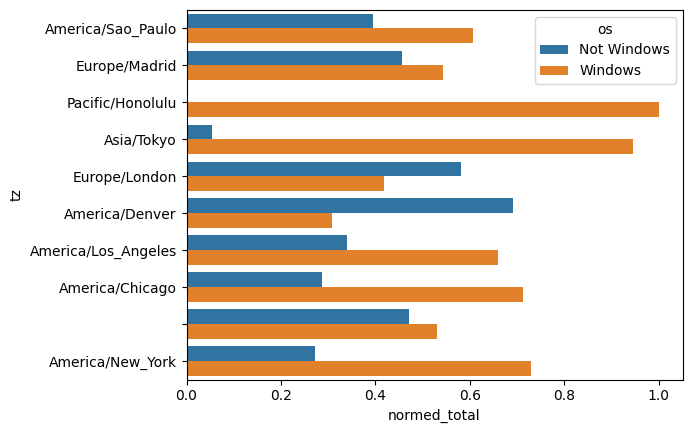

In [23]:
import seaborn as sns
sns.barplot(data=count_subset, x='normed_total', y='tz', hue='os')

In [24]:
ratings = pd.read_csv('datasets/ml-latest-small/ratings.csv')
# print(ratings)
movies = pd.read_table('datasets/ml-latest-small/movies.csv', sep=",")
# print(movies)
tags = pd.read_table('datasets/ml-latest-small/tags.csv', sep=",")
print(tags)

data = pd.merge(movies, ratings)
data

      userId  movieId               tag   timestamp
0          2    60756             funny  1445714994
1          2    60756   Highly quotable  1445714996
2          2    60756      will ferrell  1445714992
3          2    89774      Boxing story  1445715207
4          2    89774               MMA  1445715200
...      ...      ...               ...         ...
3678     606     7382         for katie  1171234019
3679     606     7936           austere  1173392334
3680     610     3265            gun fu  1493843984
3681     610     3265  heroic bloodshed  1493843978
3682     610   168248  Heroic Bloodshed  1493844270

[3683 rows x 4 columns]


,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483
...,...,...,...,...,...,...
100831,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,184,4.0,1537109082
100832,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,184,3.5,1537109545
100833,193585,Flint (2017),Drama,184,3.5,1537109805
100834,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,184,3.5,1537110021


In [25]:
genres = movies.genres
all_genres = []
for genre in genres:
  if not genre or genre == '':
    continue
  all_genres.extend(genre.split("|"))
all_genres = pd.unique(all_genres)
all_genres

array(['Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy',
       'Romance', 'Drama', 'Action', 'Crime', 'Thriller', 'Horror',
       'Mystery', 'Sci-Fi', 'War', 'Musical', 'Documentary', 'IMAX',
       'Western', 'Film-Noir', '(no genres listed)'], dtype=object)

In [26]:
zero_matrix = np.zeros((len(movies), len(all_genres)))
dummies = pd.DataFrame(zero_matrix, columns=all_genres)

for i, gen in enumerate(movies.genres):
  indices = dummies.columns.get_indexer(gen.split('|'))
  dummies.iloc[i, indices] = 1

movies_windic = movies.join(dummies.add_prefix('Genre_'))
movies_windic

,movieId,title,genres,Genre_Adventure,Genre_Animation,Genre_Children,Genre_Comedy,Genre_Fantasy,Genre_Romance,Genre_Drama,...,Genre_Horror,Genre_Mystery,Genre_Sci-Fi,Genre_War,Genre_Musical,Genre_Documentary,Genre_IMAX,Genre_Western,Genre_Film-Noir,Genre_(no genres listed)
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1.0,1.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,Grumpier Old Men (1995),Comedy|Romance,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0.0,0.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,Father of the Bride Part II (1995),Comedy,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9739,193585,Flint (2017),Drama,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
np.random.seed(12346)
arr = np.random.randn(5, 5)
arr

array([[-8.99822478e-02,  7.59372617e-01,  7.48336101e-01,
        -9.81497953e-01,  3.65775545e-01],
       [-3.15442628e-01, -8.66135605e-01,  2.78568155e-02,
        -4.55597723e-01, -1.60189223e+00],
       [ 2.48256116e-01, -3.21536673e-01, -8.48730755e-01,
         4.60468309e-04, -5.46459347e-01],
       [ 2.53915229e-01,  1.93684246e+00, -7.99504902e-01,
        -5.69159281e-01,  4.89244731e-02],
       [-6.49092950e-01, -4.79535727e-01, -9.53521432e-01,
         1.42253882e+00,  1.75403128e-01]])

In [28]:
arr[::2].sort(1)
arr

array([[-9.81497953e-01, -8.99822478e-02,  3.65775545e-01,
         7.48336101e-01,  7.59372617e-01],
       [-3.15442628e-01, -8.66135605e-01,  2.78568155e-02,
        -4.55597723e-01, -1.60189223e+00],
       [-8.48730755e-01, -5.46459347e-01, -3.21536673e-01,
         4.60468309e-04,  2.48256116e-01],
       [ 2.53915229e-01,  1.93684246e+00, -7.99504902e-01,
        -5.69159281e-01,  4.89244731e-02],
       [-9.53521432e-01, -6.49092950e-01, -4.79535727e-01,
         1.75403128e-01,  1.42253882e+00]])

In [29]:
arr[:, :1]


array([[-0.98149795],
       [-0.31544263],
       [-0.84873075],
       [ 0.25391523],
       [-0.95352143]])

In [30]:
arr[:, 1:]


array([[-8.99822478e-02,  3.65775545e-01,  7.48336101e-01,
         7.59372617e-01],
       [-8.66135605e-01,  2.78568155e-02, -4.55597723e-01,
        -1.60189223e+00],
       [-5.46459347e-01, -3.21536673e-01,  4.60468309e-04,
         2.48256116e-01],
       [ 1.93684246e+00, -7.99504902e-01, -5.69159281e-01,
         4.89244731e-02],
       [-6.49092950e-01, -4.79535727e-01,  1.75403128e-01,
         1.42253882e+00]])

In [31]:
arr[:, :1] < arr[:, 1:]

array([[ True,  True,  True,  True],
       [False,  True, False, False],
       [ True,  True,  True,  True],
       [ True, False, False, False],
       [ True,  True,  True,  True]])

In [42]:
stat_data = data.groupby(['movieId', 'title'])['rating'].agg(['count','mean', 'sum'])
stat_data.columns.name = 'stats'
stat_data[stat_data['count'] > 100]

,stats,count,mean,sum
movieId,title,,,
1,Toy Story (1995),215,3.920930,843.0
2,Jumanji (1995),110,3.431818,377.5
6,Heat (1995),102,3.946078,402.5
10,GoldenEye (1995),132,3.496212,461.5
32,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),177,3.983051,705.0
...,...,...,...,...
48516,"Departed, The (2006)",107,4.252336,455.0
58559,"Dark Knight, The (2008)",149,4.238255,631.5
60069,WALL·E (2008),104,4.057692,422.0


In [45]:

ratings_by_movieId = data.groupby(['movieId']).size()
ratings_by_movieId = ratings_by_movieId.index[ratings_by_movieId > 100]
stat_data.loc[ratings_by_movieId].sort_values(by='count', ascending=False)[:100]
# data.loc[ratings_by_movieId]

,stats,count,mean,sum
movieId,title,,,
356,Forrest Gump (1994),329,4.164134,1370.0
318,"Shawshank Redemption, The (1994)",317,4.429022,1404.0
296,Pulp Fiction (1994),307,4.197068,1288.5
593,"Silence of the Lambs, The (1991)",279,4.161290,1161.0
2571,"Matrix, The (1999)",278,4.192446,1165.5
...,...,...,...,...
5989,Catch Me If You Can (2002),115,3.921739,451.0
208,Waterworld (1995),115,2.913043,335.0
587,Ghost (1990),115,3.434783,395.0


In [4]:
import pandas as pd

df = pd.read_csv('./datasets/names/yob1880.txt')

columns = ['name', 'sex', 'births']
years = range(1880, 2023)

pieces = []
for year in years:
    frame = pd.read_csv(f'datasets/names/yob{year}.txt', names= columns)
    frame['year'] = year
    pieces.append(frame)

names = pd.concat(pieces, ignore_index=False)
names
    

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
31910,Zuberi,M,5,2022
31911,Zydn,M,5,2022
31912,Zylon,M,5,2022
31913,Zymeer,M,5,2022


In [5]:
names.groupby('sex').births.sum()

sex
F    180680711
M    184615480
Name: births, dtype: int64

In [59]:
total_births = names.groupby(['year', 'sex']).births.sum().unstack()
total_births

sex,F,M
year,,
1880,90994,110490
1881,91953,100737
1882,107847,113686
1883,112320,104625
1884,129019,114442
...,...,...
2018,1698373,1813377
2019,1675139,1790682
2020,1612393,1721588


In [65]:
names.groupby(['year', 'sex']).births.sum()

year  sex
1880  F        90994
      M       110490
1881  F        91953
      M       100737
1882  F       107847
              ...   
2020  M      1721588
2021  F      1635800
      M      1743913
2022  F      1628730
      M      1733166
Name: births, Length: 286, dtype: int64

<Axes: title={'center': 'Total births by sex and year'}, xlabel='year'>

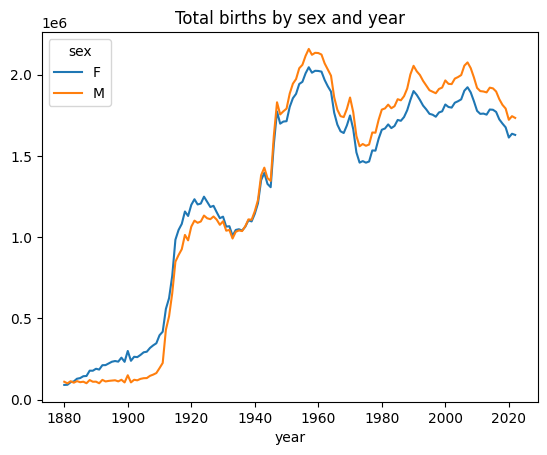

In [12]:
total_births.tail()
total_births.plot(title='Total births by sex and year')

In [19]:
def add_prop(group):
    group['prop'] = group.births / group.births.sum()
    return group

prop_names = names.groupby(['year', 'sex'], group_keys=False).apply(add_prop)
prop_names

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077642
1,Anna,F,2604,1880,0.028617
2,Emma,F,2003,1880,0.022012
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
31910,Zuberi,M,5,2022,0.000003
31911,Zydn,M,5,2022,0.000003
31912,Zylon,M,5,2022,0.000003
31913,Zymeer,M,5,2022,0.000003


In [22]:
prop_names.groupby(['year', 'sex']).prop.sum()

year  sex
1880  F      1.0
      M      1.0
1881  F      1.0
      M      1.0
1882  F      1.0
            ... 
2020  M      1.0
2021  F      1.0
      M      1.0
2022  F      1.0
      M      1.0
Name: prop, Length: 286, dtype: float64

In [26]:
top1000 = prop_names.groupby(['year', 'sex']).apply(lambda group: group.sort_values(by='births', ascending=False)[:1000])
top1000.reset_index(inplace=True, drop=True)
top1000

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077642
1,Anna,F,2604,1880,0.028617
2,Emma,F,2003,1880,0.022012
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
285871,Atharv,M,223,2022,0.000129
285872,Imran,M,223,2022,0.000129
285873,Asaiah,M,223,2022,0.000129
285874,Kalel,M,222,2022,0.000128


<Axes: title={'center': 'Sum of table1000.prop by year and sex'}, xlabel='year'>

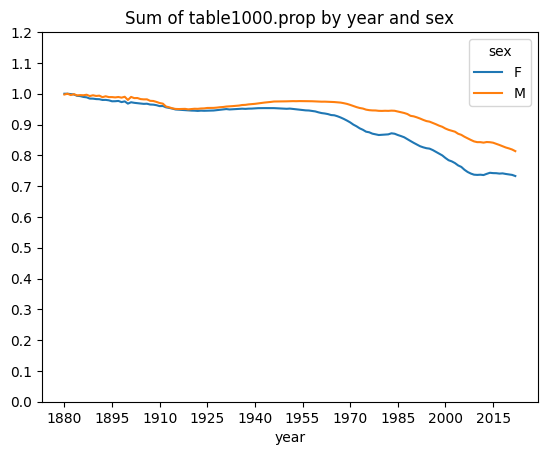

In [32]:
import numpy as np
table = top1000.pivot_table('prop', index='year', columns='sex', aggfunc=sum)
table.plot(title = 'Sum of table1000.prop by year and sex', yticks=np.linspace(0, 1.2, 13), xticks=range(1880, 2023, 15))

In [33]:
boys = top1000[top1000.sex == 'M']
grils = top1000[top1000.sex == 'F']

In [38]:
df = boys[boys.year == 2020]
print(df.sort_values(by='prop', ascending=False).prop)
prop_cumsum = df.sort_values(by='prop', ascending=False).prop.cumsum()
prop_cumsum.iloc[:10]

280876    0.011517
280877    0.010692
280878    0.008284
280879    0.007651
280880    0.007344
            ...   
281871    0.000124
281872    0.000124
281873    0.000124
281874    0.000123
281875    0.000123
Name: prop, Length: 1000, dtype: float64


280876    0.011517
280877    0.022209
280878    0.030493
280879    0.038144
280880    0.045488
280881    0.052672
280882    0.059778
280883    0.066377
280884    0.072636
280885    0.078587
Name: prop, dtype: float64

In [40]:
prop_cumsum.values.searchsorted(0.5)

162

In [66]:
def get_quantile_count(group, q=0.5):
    group = group.sort_values(by='prop', ascending=False)
    return group.prop.cumsum().values.searchsorted(q) + 1

diversity = top1000.groupby(['year', 'sex']).apply(get_quantile_count)

diversity = top1000.groupby(['year', 'sex']).apply(lambda group: group.sort_values(by='prop', ascending=False).prop.cumsum().values.searchsorted(0.5) + 1)
diversity

year  sex
1880  F       38
      M       14
1881  F       38
      M       14
1882  F       38
            ... 
2020  M      163
2021  F      276
      M      167
2022  F      283
      M      173
Length: 286, dtype: int64

In [67]:
diversity.unstack('sex')

sex,F,M
year,,
1880,38,14
1881,38,14
1882,38,15
1883,39,15
1884,39,16
...,...,...
2018,259,149
2019,265,155
2020,272,163


<Axes: title={'center': 'Number of popular names in top 50%'}, xlabel='year'>

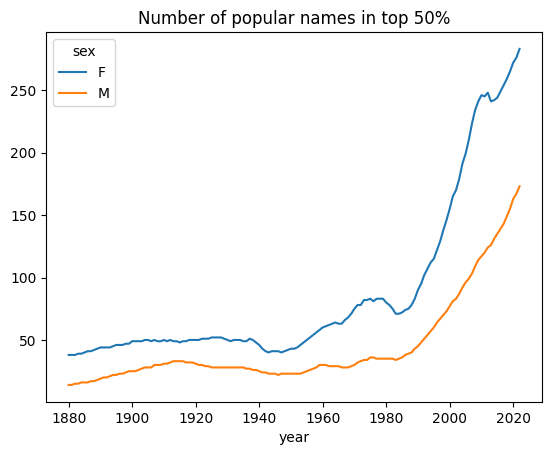

In [68]:
diversity.unstack('sex').plot(title="Number of popular names in top 50%")

In [69]:
last_letters = names.name.map(lambda name: name[-1])
last_letters

0        y
1        a
2        a
3        h
4        e
        ..
31910    i
31911    n
31912    n
31913    r
31914    e
Name: name, Length: 2085158, dtype: object

In [73]:
last_letters.name = 'last_letter'
table = names.pivot_table('births', index=last_letters, columns=['sex', 'year'], aggfunc=sum)
table

sex                F                                                        \
year            1880     1881     1882     1883     1884     1885     1886   
last_letter                                                                  
a            31446.0  31581.0  36536.0  38329.0  43680.0  45408.0  49100.0   
b                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
c                NaN      NaN      5.0      5.0      NaN      NaN      NaN   
d              609.0    607.0    734.0    810.0    916.0    862.0   1007.0   
e            33381.0  34080.0  40399.0  41914.0  48089.0  49616.0  53883.0   
f                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
g                7.0      5.0     12.0      8.0     24.0     11.0     18.0   
h             4863.0   4783.0   5566.0   5701.0   6602.0   6623.0   7146.0   
i               61.0     78.0     81.0     76.0     84.0     92.0     85.0   
j                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
k               13.0     15.0     11.0     17.0     21.0     18.0     27.0   
l             2541.0   2910.0   3527.0   3848.0   4807.0   5144.0   5721.0   
m               58.0     57.0     81.0     86.0     79.0     75.0    103.0   
n             3008.0   2959.0   3575.0   3836.0   4507.0   4735.0   5242.0   
o               30.0     49.0     35.0     47.0     74.0     84.0     93.0   
p                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
q                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
r              481.0    417.0    590.0    640.0    718.0    799.0    917.0   
s             1391.0   1316.0   1637.0   1794.0   2038.0   2127.0   2524.0   
t             2152.0   2165.0   2399.0   2554.0   2824.0   2889.0   3017.0   
u              380.0    427.0    410.0    444.0    490.0    495.0    511.0   
v                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
w                NaN      5.0      NaN      NaN      NaN      NaN      5.0   
x                NaN      NaN      NaN      7.0      NaN      NaN      NaN   
y            10467.0  10404.0  12143.0  12063.0  13918.0  13927.0  14932.0   
z              106.0     95.0    106.0    141.0    148.0    150.0    202.0   

sex                                     ...         M                      \
year            1887     1888     1889  ...      2013      2014      2015   
last_letter                             ...                                 
a            48942.0  59440.0  58631.0  ...   27478.0   28329.0   29068.0   
b                NaN      NaN      NaN  ...   33285.0   31426.0   29643.0   
c                NaN      NaN      NaN  ...   24099.0   23854.0   23164.0   
d             1027.0   1298.0   1374.0  ...   42732.0   44095.0   43833.0   
e            54353.0  66748.0  66662.0  ...  132378.0  132244.0  128753.0   
f                NaN      NaN      NaN  ...    2594.0    2883.0    2829.0   
g               25.0     44.0     28.0  ...    4430.0    4725.0    4976.0   
h             7141.0   8630.0   8825.0  ...  100061.0  102199.0  102762.0   
i              105.0    141.0    134.0  ...   45477.0   46655.0   49097.0   
j                NaN      NaN      NaN  ...    1405.0    1362.0    1454.0   
k               19.0     21.0     22.0  ...   34890.0   35810.0   35427.0   
l             6174.0   7900.0   8395.0  ...  126920.0  127683.0  127940.0   
m               90.0    123.0    137.0  ...   57118.0   58785.0   59181.0   
n             5512.0   6832.0   7103.0  ...  669878.0  673873.0  662908.0   
o               97.0    134.0    142.0  ...   79544.0   82429.0   86656.0   
p                NaN      NaN      NaN  ...    2600.0    2526.0    2381.0   
q                NaN      NaN      NaN  ...     336.0     312.0     351.0   
r              910.0   1207.0   1214.0  ...  170528.0  178302.0  181255.0   
s             2803.0   3581.0   3569.0  ...  123910.0  128315.0  130231.0   
t             3140.0   3816.0   3784.0  ...

In [76]:
names.groupby([last_letters, 'sex', 'year']).births.sum().unstack(['sex', 'year'])

sex                F                                                        \
year            1880     1881     1882     1883     1884     1885     1886   
last_letter                                                                  
a            31446.0  31581.0  36536.0  38329.0  43680.0  45408.0  49100.0   
b                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
c                NaN      NaN      5.0      5.0      NaN      NaN      NaN   
d              609.0    607.0    734.0    810.0    916.0    862.0   1007.0   
e            33381.0  34080.0  40399.0  41914.0  48089.0  49616.0  53883.0   
f                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
g                7.0      5.0     12.0      8.0     24.0     11.0     18.0   
h             4863.0   4783.0   5566.0   5701.0   6602.0   6623.0   7146.0   
i               61.0     78.0     81.0     76.0     84.0     92.0     85.0   
j                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
k               13.0     15.0     11.0     17.0     21.0     18.0     27.0   
l             2541.0   2910.0   3527.0   3848.0   4807.0   5144.0   5721.0   
m               58.0     57.0     81.0     86.0     79.0     75.0    103.0   
n             3008.0   2959.0   3575.0   3836.0   4507.0   4735.0   5242.0   
o               30.0     49.0     35.0     47.0     74.0     84.0     93.0   
p                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
q                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
r              481.0    417.0    590.0    640.0    718.0    799.0    917.0   
s             1391.0   1316.0   1637.0   1794.0   2038.0   2127.0   2524.0   
t             2152.0   2165.0   2399.0   2554.0   2824.0   2889.0   3017.0   
u              380.0    427.0    410.0    444.0    490.0    495.0    511.0   
v                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
w                NaN      5.0      NaN      NaN      NaN      NaN      5.0   
x                NaN      NaN      NaN      7.0      NaN      NaN      NaN   
y            10467.0  10404.0  12143.0  12063.0  13918.0  13927.0  14932.0   
z              106.0     95.0    106.0    141.0    148.0    150.0    202.0   

sex                                     ...         M                      \
year            1887     1888     1889  ...      2013      2014      2015   
last_letter                             ...                                 
a            48942.0  59440.0  58631.0  ...   27478.0   28329.0   29068.0   
b                NaN      NaN      NaN  ...   33285.0   31426.0   29643.0   
c                NaN      NaN      NaN  ...   24099.0   23854.0   23164.0   
d             1027.0   1298.0   1374.0  ...   42732.0   44095.0   43833.0   
e            54353.0  66748.0  66662.0  ...  132378.0  132244.0  128753.0   
f                NaN      NaN      NaN  ...    2594.0    2883.0    2829.0   
g               25.0     44.0     28.0  ...    4430.0    4725.0    4976.0   
h             7141.0   8630.0   8825.0  ...  100061.0  102199.0  102762.0   
i              105.0    141.0    134.0  ...   45477.0   46655.0   49097.0   
j                NaN      NaN      NaN  ...    1405.0    1362.0    1454.0   
k               19.0     21.0     22.0  ...   34890.0   35810.0   35427.0   
l             6174.0   7900.0   8395.0  ...  126920.0  127683.0  127940.0   
m               90.0    123.0    137.0  ...   57118.0   58785.0   59181.0   
n             5512.0   6832.0   7103.0  ...  669878.0  673873.0  662908.0   
o               97.0    134.0    142.0  ...   79544.0   82429.0   86656.0   
p                NaN      NaN      NaN  ...    2600.0    2526.0    2381.0   
q                NaN      NaN      NaN  ...     336.0     312.0     351.0   
r              910.0   1207.0   1214.0  ...  170528.0  178302.0  181255.0   
s             2803.0   3581.0   3569.0  ...  123910.0  128315.0  130231.0   
t             3140.0   3816.0   3784.0  ...

In [79]:
subtable  = table.reindex(columns=[1910, 1960, 2021, 2020], level='year')
subtable

sex                 F                                      M            \
year             1910      1960      2021      2020     1910      1960   
last_letter                                                              
a            108399.0  691323.0  623423.0  615904.0    977.0    5217.0   
b                 NaN     694.0     538.0     530.0    411.0    3911.0   
c                 5.0      49.0     859.0     898.0    482.0   15458.0   
d              6751.0    3731.0    4005.0    3825.0  22112.0  262131.0   
e            133599.0  435008.0  288841.0  285726.0  28665.0  178762.0   
f                 NaN      20.0     189.0     161.0    152.0    9230.0   
g                57.0     316.0     798.0     714.0    439.0   20231.0   
h             20432.0   73240.0  111391.0  111641.0   8849.0   80842.0   
i               605.0   80812.0   82124.0   76924.0    164.0    1300.0   
j                 NaN       NaN     159.0     142.0      NaN       NaN   
k                48.0     314.0     716.0     586.0   7104.0  105276.0   
l             17124.0   68489.0   34404.0   34250.0  12628.0  223645.0   
m               476.0   17411.0    7566.0    6715.0  11273.0   72138.0   
n             31418.0  264242.0  181843.0  183651.0  27847.0  325186.0   
o               663.0    4933.0    4186.0    3501.0   3314.0   27378.0   
p                 7.0      47.0     124.0     152.0    616.0   12098.0   
q                 NaN       NaN      65.0      69.0      NaN       NaN   
r              5311.0   13680.0   55870.0   53643.0  12521.0   66206.0   
s             15478.0   25805.0   20106.0   18998.0  25402.0  218977.0   
t             10877.0   30729.0   24852.0   23784.0  14155.0  139965.0   
u               271.0    1161.0    1227.0    1082.0     24.0     121.0   
v                 NaN     122.0     475.0     473.0     22.0      77.0   
w                 8.0      63.0    7974.0    6723.0   1228.0   16430.0   
x                 6.0      74.0    3484.0    3382.0    770.0    3946.0   
y             44002.0  308468.0  179508.0  177855.0  15021.0  343312.0   
z               966.0    1330.0    1073.0    1064.0     33.0     393.0   

sex                              
year             2021      2020  
last_letter                      
a             37436.0   33872.0  
b             17460.0   18106.0  
c             16095.0   16690.0  
d             39462.0   38939.0  
e            119913.0  116636.0  
f              2718.0    2723.0  
g              4370.0    4599.0  
h             93381.0   93998.0  
i             58733.0   55951.0  
j              1399.0    1462.0  
k             35694.0   35085.0  
l            112922.0  112610.0  
m             58319.0   56620.0  
n            533958.0  541545.0  
o            110960.0  103492.0  
p              2829.0    2607.0  
q               355.0     330.0  
r            165921.0  163862.0  
s            139315.0  134224.0  
t             58749.0   56454.0  
u              6609.0    5808.0  
v              3164.0    2916.0  
w             16373.0   17208.0  
x             21129.0   20084.0  
y             83106.0   82307.0  
z              3543.0    3460.0

In [82]:
subtable.sum()

sex  year
F    1910     396503.0
     1960    2022061.0
     2021    1635800.0
     2020    1612393.0
M    1910     194209.0
     1960    2132230.0
     2021    1743913.0
     2020    1721588.0
dtype: float64

<Axes: xlabel='year'>

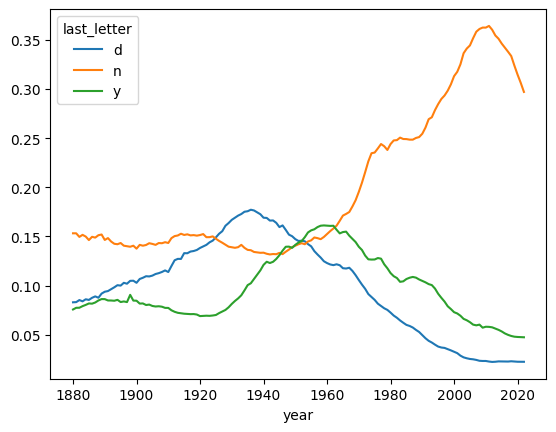

In [87]:
letter_prop = table / table.sum() 
letter_prop.loc[['d', 'n', 'y'], 'M'].T.plot()

In [93]:
all_names = pd.Series(top1000.name.unique())
lesley_like = all_names[all_names.str.lower().str.contains('lesl')]
lesley_like

632     Leslie
2293    Lesley
4263    Leslee
4730     Lesli
6105     Lesly
dtype: object

In [96]:
filtered_table = top1000[top1000.name.isin(lesley_like)]
filtered_table.groupby('name').births.sum()

name
Leslee       993
Lesley     35039
Lesli        929
Leslie    380170
Lesly      11434
Name: births, dtype: int64

<Axes: xlabel='year'>

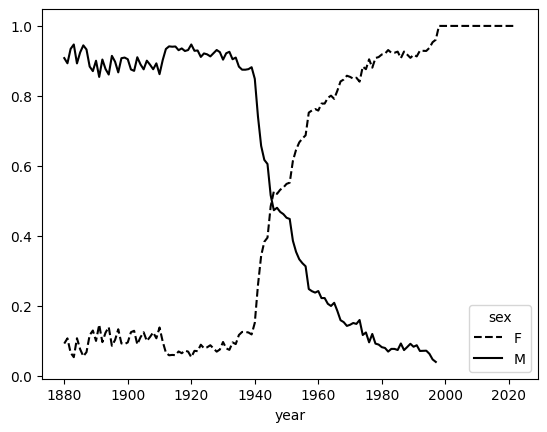

In [101]:
table = filtered_table.pivot_table('births', index='year', columns='sex', aggfunc=sum)
table = table.div(table.sum(1), axis=0)
table.plot(style={'M': 'k-', 'F': 'k--'})
